# Importing libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Read Data



In [4]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Read Data



In [5]:

columnsName = df.columns.tolist()

for index, name in enumerate(columnsName):
    print(f"Column {index}: {name}")


Column 0: CustomerID
Column 1: Count
Column 2: Country
Column 3: State
Column 4: City
Column 5: Zip Code
Column 6: Lat Long
Column 7: Latitude
Column 8: Longitude
Column 9: Gender
Column 10: Senior Citizen
Column 11: Partner
Column 12: Dependents
Column 13: Tenure Months
Column 14: Phone Service
Column 15: Multiple Lines
Column 16: Internet Service
Column 17: Online Security
Column 18: Online Backup
Column 19: Device Protection
Column 20: Tech Support
Column 21: Streaming TV
Column 22: Streaming Movies
Column 23: Contract
Column 24: Paperless Billing
Column 25: Payment Method
Column 26: Monthly Charges
Column 27: Total Charges
Column 28: Churn Label
Column 29: Churn Value
Column 30: Churn Score
Column 31: CLTV
Column 32: Churn Reason


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

CustomerID : ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Country : ['United States']
State : ['California']
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Lat Long : ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year'

In [8]:
df.drop(columns=['CustomerID'], inplace=True)
#df.drop(columns=['Lat Long'], inplace=True)
df.drop(columns=['Churn Reason'], inplace=True)

In [9]:
df.head(1)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239


In [10]:
print(df.isnull().sum())


Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64


In [11]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [9]:
columnsName=df.drop(labels='Churn Label',axis=1).columns.values.tolist()
columnsName

['Count',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Lat Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [11]:
df.shape

(7043, 31)

In [12]:
cols = df.select_dtypes(include=['object']).columns
cols

Index(['Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges',
       'Churn Label'],
      dtype='object')

In [13]:

mixed_type_columns = ['Total Charges']

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
print(df.dtypes)
print(df.head())


Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object
   Count        Country       State         City  Zip Code  \
0      1  United States  

# Make LabelEncoder for objectes 

In [14]:
df[columnsName] = df[columnsName].apply(LabelEncoder().fit_transform)
df.head(1)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,0,0,0,562,2,327,327,1148,1,0,...,0,0,1,3,436,536,Yes,1,70,867


# Start building the modle 

In [15]:
x=df.drop('Churn Label',axis=1).values
y=df['Churn Label'].values

In [17]:
from sklearn.ensemble import RandomForestClassifier


In [18]:
x_train ,x_test ,y_train ,y_test=train_test_split(x,y ,test_size=0.25,random_state=42)
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features=4)




In [19]:
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=3, max_features=4, n_estimators=5)

In [20]:
rf.score(x_train , y_train)


0.9062854979174555

In [21]:
rf.score(x_test , y_test)


0.8904031800113572

In [22]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [23]:
v = confusion_matrix(y_test , rf.predict(x_test))
v

array([[1214,   48],
       [ 145,  354]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

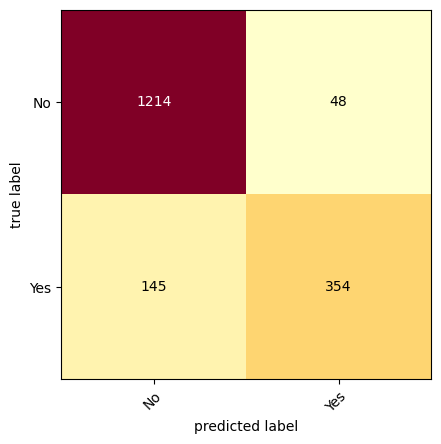

In [24]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(v , class_names=["No","Yes"], cmap='YlOrRd')


In [25]:
print (classification_report(y_test  , rf.predict(x_test)))


              precision    recall  f1-score   support

          No       0.89      0.96      0.93      1262
         Yes       0.88      0.71      0.79       499

    accuracy                           0.89      1761
   macro avg       0.89      0.84      0.86      1761
weighted avg       0.89      0.89      0.89      1761



## From the results, it's clear that there are some issues that need to be addressed in order to increase accuracy.

In [30]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)


In [31]:
from imblearn.over_sampling import SMOTE


In [33]:
x_train ,x_test ,y_train ,y_test=train_test_split(X_res, y_res  ,test_size=0.25,random_state=42)


In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)

In [34]:
rf.fit(x_train , y_train)


RandomForestClassifier(max_depth=3, max_features=4, n_estimators=5)

In [35]:
rf.score(x_train , y_train)

0.9672722587295451

In [36]:
rf.score(x_test , y_test)


0.9663703131039815

In [37]:
m= confusion_matrix(y_test , rf.predict(x_test))
m

array([[1189,   87],
       [   0, 1311]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

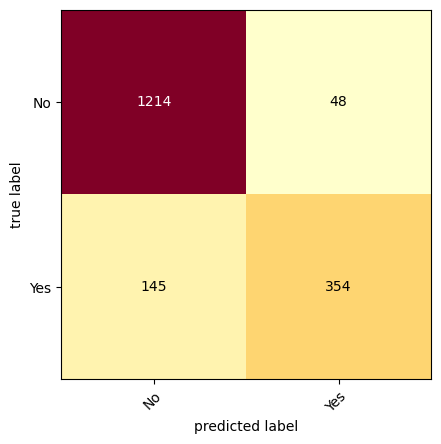

In [38]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(v , class_names=["No","Yes"], cmap='YlOrRd')


In [39]:
print (classification_report(y_test  , rf.predict(x_test)))


              precision    recall  f1-score   support

          No       1.00      0.93      0.96      1276
         Yes       0.94      1.00      0.97      1311

    accuracy                           0.97      2587
   macro avg       0.97      0.97      0.97      2587
weighted avg       0.97      0.97      0.97      2587



# Started in PSO algorithm

In [43]:
def calculate_accuracy(x):
    X = df[x]  # Assuming df is your DataFrame containing features
    # Assuming you have labels y defined somewhere
    min_samples = min(len(X), len(y))  # Get the minimum number of samples
    x_train, x_test, y_train, y_test = train_test_split(X[:min_samples], y[:min_samples], test_size=0.25, random_state=42)
    rf = RandomForestClassifier(n_estimators=5, max_depth=3, max_features=4)
    rf.fit(x_train, y_train)
    accuracy = rf.score(x_test, y_test)
    print('Accuracy:',accuracy)
    return accuracy


In [50]:
df.shape

(7043, 31)

In [51]:
import random


In [55]:
columnsName1=[0,1]
chromosomes=[]
for i in range(10):
    chro1=[]
    for i in range(30):
        item= random.choice(tuple(columnsName1))
        chro1.append(item)
    chromosomes.append(chro1)

In [56]:
def data(chromosomes1):
    chromosomes2=[]
    for i in range(len(chromosomes1)):
        if chromosomes1[i]==1:
                chromosomes2.append(columnsName[i])
    return chromosomes2

In [57]:
pb = []

def checkpersonalnest():
    for i in range(len(chromosomes)):
        pb.append(calculate_accuracy(data(chromosomes[i])))
checkpersonalnest()
#def calculate_score(processed_data):
    # Replace this with your logic to calculate score based on processed_data
    
 #   return score_value

Accuracy: 0.8960817717206133
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.7660420215786485
Accuracy: 0.7620670073821693
Accuracy: 0.8938103350369109
Accuracy: 0.986939239068711
Accuracy: 0.7756956274843839


In [58]:
def checkvelocity(globalbest):
    velocity = []
    if globalbest:
        for j in range(len(chromosomes)):
            velocity.append(list(0 + 1 * (np.random.random(1)[0]) * (np.array(chromosomes[j]) - np.array(chromosomes[j])) + 1 * (np.random.random(1)[0]) * (np.array(globalbest) - np.array(chromosomes[j]))))
    else:
        print("Globalbest is empty, cannot calculate velocity.")
    return velocity


In [59]:
def addingchromosomes(velocity):
    chromosomes2=[]
    for i in range(len(velocity)):
        nextchromo=[]
        for j in range(len(velocity[i])):
            nextchromo.append(chromosomes[i][j]+velocity[i][j])
        chromosomes2.append(nextchromo)
    return chromosomes2

In [60]:
def normalize(chromosomes2):
    for l in range(len(chromosomes2)):
        for m in range(len(chromosomes2[l])):
            if chromosomes2[l][m]>0.5:
                chromosomes2[l][m]=1
            else:
                chromosomes2[l][m]=0
    return chromosomes2

In [61]:
def checkpd(chromosomes2):
    personal=[]
    for i in range(len(chromosomes2)):
        personal.append(calaculate_accuracy(data(chromosomes2[i])))
    for j in range(len(personal)):
        if(personal[j]>pb[j]):
            chromosomes[j]=chromosomes2[j]
            pb[j]=personal[j]
    return personal

In [62]:
def checkpd(chromosomes2):
    personal=[]
    for i in range(len(chromosomes2)):
        personal.append(calculate_accuracy(data(chromosomes2[i])))
    for j in range(len(personal)):
        if personal[j] > pb[j]:
            pb[j] = personal[j]
    return personal


In [63]:
if pb:
    max_value = max(pb)
    ind = pb.index(max_value)
    globalbest = chromosomes[ind]
else:
    print("The list is empty, cannot find the maximum.")
for i in range(20):
    chromosomes2 = []
    personal = []
    velocity = checkvelocity(globalbest)
    chromosomes2 = addingchromosomes(velocity)
    chromosomes2 = normalize(chromosomes2)
    personal = checkpd(chromosomes2)
    if pb:
        max_value = max(pb)
        ind = pb.index(max_value)
        globalbest = chromosomes[ind]
    else:
        print("The list is empty, cannot find the maximum.")


Accuracy: 0.9108461101646792
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.956274843838728
Accuracy: 0.9903463940942646
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.7904599659284497
Accuracy: 0.9892106757524134
Accuracy: 1.0
Accuracy: 0.9500283929585462
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.7632027257240205
Accuracy: 0.9801249290176036
Accuracy: 1.0
Accuracy: 0.7836456558773425
Accuracy: 0.9006246450880182
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9505962521294719
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9818285065303805
Accuracy: 0.7722884724588303
Accuracy: 0.9051675184554231
Accuracy: 1.0
Accuracy: 0.9676320272572402
Accuracy: 1.0
Accuracy: 0.9875070982396366
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.8938103350369109
Accuracy: 1.0
Accuracy: 0.7859170925610448
Accuracy: 1.0
Accuracy: 0.9977285633162976
Accuracy: 0.9880749574105622
Accuracy: 0.9812606473594548
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.7728563316297559
Accuracy: 0.8

In [65]:
max(pb)

1.0

In [66]:
ind = pb.index(max(pb))
print(ind)
globalbest=chromosomes[ind]

0


In [85]:
print(data(globalbest))

['Lat Long', 'Gender', 'Partner', 'Tenure Months', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming Movies', 'Churn Score', 'CLTV']


In [86]:
selected_features = ['Lat Long', 'Gender', 'Partner', 'Tenure Months', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming Movies', 'Churn Score', 'CLTV']
data_selected = df[selected_features].copy()


In [87]:
data_selected

,Lat Long,Gender,Partner,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming Movies,Churn Score,CLTV
0,327,1,0,2,0,2,2,0,0,0,70,867
1,405,0,0,2,1,0,0,0,0,0,51,486
2,393,0,0,8,1,0,0,2,0,2,70,2587
3,410,0,1,28,1,0,0,2,2,2,68,2260
4,385,1,0,49,1,0,2,2,0,2,73,2556
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,587,0,0,72,2,1,1,1,1,1,29,2528
7039,636,1,1,24,0,2,0,2,2,2,43,101
7040,625,0,1,72,1,0,2,2,0,2,55,2756
7041,512,0,1,11,0,2,0,0,0,0,43,550


In [137]:
x_train ,x_test ,y_train ,y_test=train_test_split(x,y ,test_size=0.25,random_state=42)
rf = RandomForestClassifier(n_estimators= 25 , max_depth= 20 , max_features=12)
rf.fit(x_train, y_train)



RandomForestClassifier(max_depth=20, max_features=12, n_estimators=25)

In [138]:
rf.score(x_train , y_train)


0.9986747444149944

In [139]:
rf.score(x_test , y_test)


0.9165247018739353

In [140]:
w = confusion_matrix(y_test , rf.predict(x_test))
w

array([[1192,   70],
       [  77,  422]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

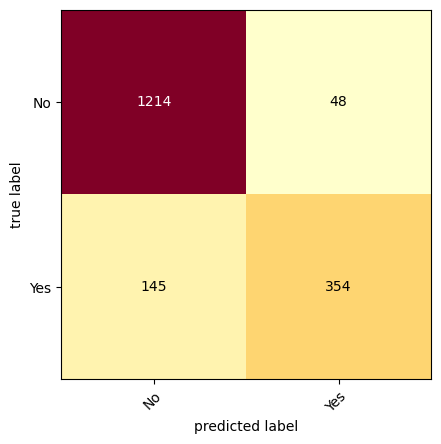

In [141]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(v , class_names=["No","Yes"], cmap='YlOrRd')


In [142]:
print (classification_report(y_test  , rf.predict(x_test)))


              precision    recall  f1-score   support

          No       0.94      0.94      0.94      1262
         Yes       0.86      0.85      0.85       499

    accuracy                           0.92      1761
   macro avg       0.90      0.90      0.90      1761
weighted avg       0.92      0.92      0.92      1761

